# **Problem** **Statement**

Viewers spend hours scrolling through hundred's of anime's sometimes finding what they like but sometimes not.

This is to provide viewrs suggestions based on their likes and create a better streaming environment that increases time spent on website

# Meet the data - konnichiwa

In [ ]:
#load the dataset
from google.colab import files
uploaded = files.upload()

Saving anime.csv to anime.csv
Saving rating.csv to rating.csv


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np

#visualiztion phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#reading the dataset
anime_data = pd.read_csv('anime.csv')
rating_data = pd.read_csv('rating.csv')

In [ ]:
#print shape of data with rows and colmns and info
print('The shape of the data is (row,column):' + str(anime_data.shape))
print(anime_data.info())

The shape of the data is (row,column):(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [ ]:
#print shape of data with rows and colmns and info
print('The shape of the data is (row,column):' + str(rating_data.shape))
print(rating_data.info())

The shape of the data is (row,column):(7813737, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


# Merging Dataframes - Fusion

In [ ]:
anime_fulldata = pd.merge(anime_data, rating_data, on='anime_id', suffixes=['', '_user'])
anime_fulldata = anime_fulldata.rename(columns={'name': 'anime_title', 
                                                'rating_user': 'user_rating'})

In [ ]:
anime_fulldata.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


# Analyze the data - Byakugan

**Top** **10** **anime** **based** **on** **rating** **counts**

Text(0, 0.5, 'User Rating count')

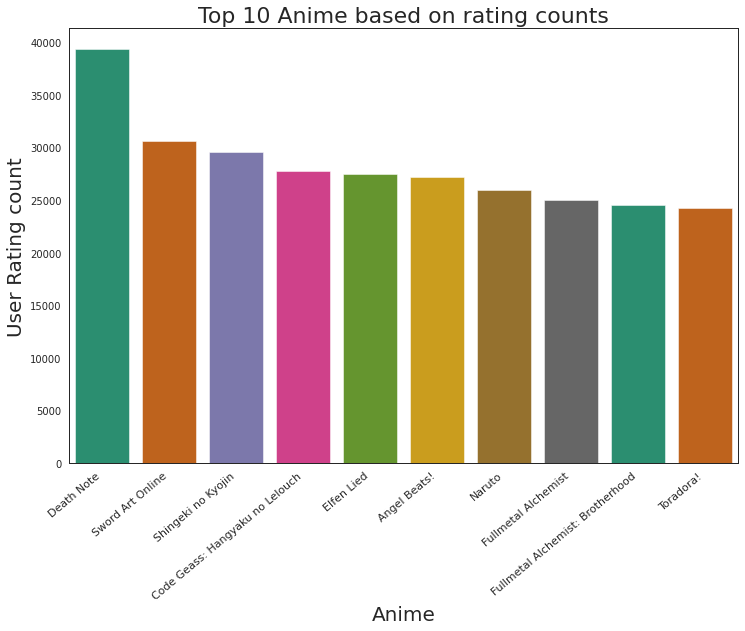

In [ ]:
# Creating a dataframe for rating counts
combine_anime_rating = anime_fulldata.dropna(axis = 0, subset = ['anime_title'])
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['anime_title'])['user_rating'].
     count().
     reset_index().rename(columns = {'rating': 'totalRatingCount'})
    [['anime_title', 'user_rating']]
    )


top10_animerating=anime_ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)

In [ ]:
anime_fulldata = anime_fulldata.merge(anime_ratingCount, left_on = 'anime_title', right_on = 'anime_title', how = 'left')
anime_fulldata = anime_fulldata.rename(columns={'user_rating_x': 'user_rating', 'user_rating_y': 'totalratingcount'})

# Top 10 Anime based on community size

In [ ]:
duplicate_anime = anime_fulldata.copy()
duplicate_anime.drop_duplicates(subset='anime_title',
                                keep='first',
                                inplace=True)

Text(0, 0.5, 'Community Size')

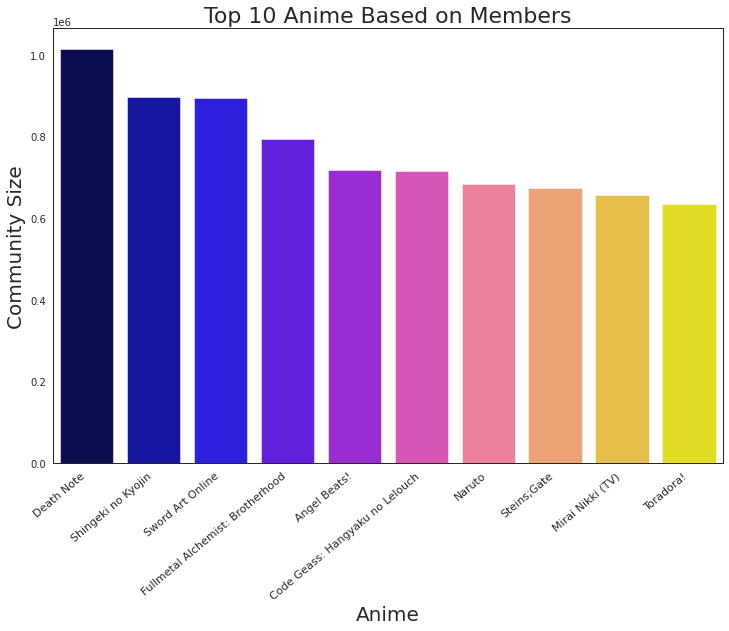

In [ ]:
top10_animemembers = duplicate_anime[['anime_title', 'members']].sort_values(by='members',
                                                                             ascending=False).head(10)
ax=sns.barplot(x='anime_title', y='members', data=top10_animemembers, palette='gnuplot2')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha='right')
ax.set_title('Top 10 Anime Based on Members', fontsize=22)
ax.set_xlabel('Anime', fontsize=20)
ax.set_ylabel('Community Size', fontsize=20)

# Distribution of Rating

Text(0.5, 1.0, 'Ratings of users')

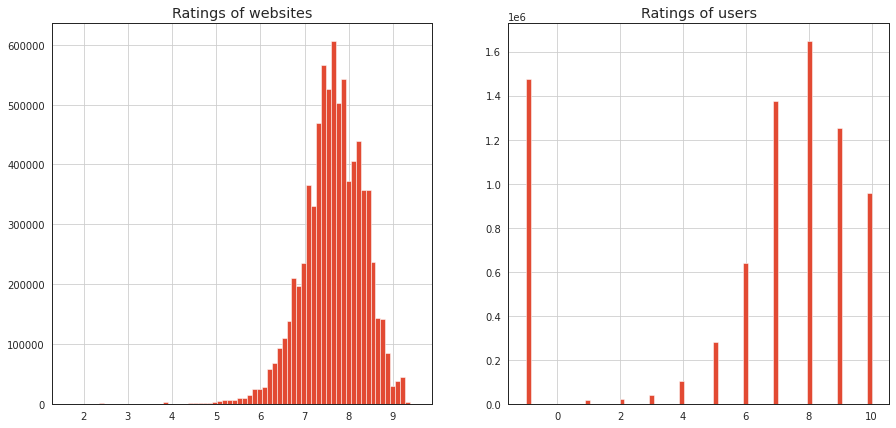

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
anime_fulldata['rating'].hist(bins=70)
plt.title('Ratings of websites')
plt.subplot(1,2,2)
anime_fulldata['user_rating'].hist(bins=70)
plt.title('Ratings of users')

**Insights**:

Most of the ratings are spread between 6-10

The mode of the distribution is around 7.5-8.0

Both the distribution are left skewed

We have -1 rating as an outlier in rating of users which can be made into NaN

# Medium of streaming

In [ ]:
import plotly.graph_objects as go
labels =anime_fulldata['type'].value_counts().index
values = anime_fulldata['type'].value_counts().values
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title={
        'text' : 'Medium of Streaming',
        'y' : 0.9,
        'x' : 0.5,
        'xanchor':'center',
        'yanchor':'top'
    }
)
fig.show()

# Genre Word Cloud

(-0.5, 799.5, 399.5, -0.5)

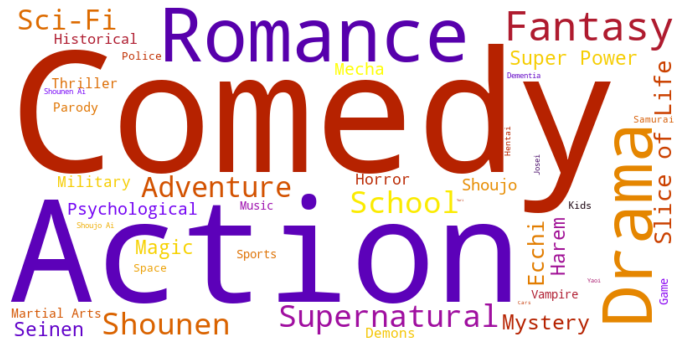

In [ ]:
nonull_anime=anime_fulldata.copy()
nonull_anime.dropna(inplace=True)
from collections import defaultdict

all_genres = defaultdict(int)

for genres in nonull_anime['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1
        
from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

# Preparing data for consumption

**Handling** **NaN** **values**

In [ ]:
anime_feature=anime_fulldata.copy()
anime_feature["user_rating"].replace({-1: np.nan}, inplace=True)
anime_feature.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating,totalratingcount
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0,2199
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0,2199
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0,2199
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0,2199
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,NaN,2199


In [ ]:
anime_feature = anime_feature.dropna(axis = 0, how ='any') 
anime_feature.isnull().sum()

anime_id            0
anime_title         0
genre               0
type                0
episodes            0
rating              0
members             0
user_id             0
user_rating         0
totalratingcount    0
dtype: int64

**Filtering user_id**

In [ ]:
anime_feature['user_id'].value_counts()

42635    3747
53698    2905
57620    2689
59643    2632
51693    2620
         ... 
41324       1
11199       1
19041       1
26082       1
62930       1
Name: user_id, Length: 69600, dtype: int64

In [ ]:
counts = anime_feature['user_id'].value_counts()
anime_feature = anime_feature[anime_feature['user_id'].isin(counts[counts >= 200].index)]

**Pivot** **Dojo**

In [ ]:
anime_pivot=anime_feature.pivot_table(index='anime_title',columns='user_id',
                                      values='user_rating').fillna(0)
anime_pivot.head()

user_id,5,7,17,38,43,46,123,129,139,160,210,226,233,235,244,248,250,256,261,271,282,288,294,301,308,317,321,326,341,352,385,392,395,418,428,436,438,439,446,455,460,462,478,492,497,500,511,529,530,531,540,541,547,551,553,565,567,572,573,578,585,593,598,611,634,637,656,659,660,661,662,670,680,687,692,694,702,721,735,741,746,750,762,768,771,774,783,784,786,795,799,806,813,814,819,820,847,861,890,894,916,920,926,936,937,943,946,954,958,963,979,995,996,1013,1019,1020,1031,1044,1058,1084,1103,1114,1116,1119,1132,1140,1145,1163,1169,1176,1190,1191,1195,1202,1210,1213,1216,1222,1223,1235,1237,1244,1274,1280,1284,1287,1306,1309,1324,1327,1332,1344,1349,1354,1366,1378,1396,1400,1404,1410,1418,1419,1425,1435,1441,1442,1450,1456,1482,1497,1501,1504,1522,1530,1541,1549,1551,1558,1570,1576,1578,1585,1589,1600,1605,1619,1620,1623,1647,1651,1689,1695,1697,1701,1705,1711,1720,1734,1737,1753,1771,1786,1788,1797,1798,1807,1811,1822,1835,1842,1843,1844,1847,1853,1854,1888,1890,1913,1918,1929,1937,1938,1947,1954,1957,1963,1984,1987,2016,2021,2025,2050,2102,2113,2115,2118,2125,2141,2165,2194,2200,2204,2212,2246,2268,2273,2290,2297,2298,2300,...,70832,70838,70839,70842,70844,70879,70881,70884,70888,70931,70938,70953,70961,70998,71008,71016,71021,71029,71078,71115,71118,71122,71178,71184,71198,71212,71224,71225,71226,71231,71250,71252,71253,71278,71284,71300,71302,71330,71339,71362,71363,71377,71429,71435,71438,71453,71456,71466,71491,71498,71508,71529,71537,71564,71573,71607,71610,71619,71632,71655,71673,71699,71731,71739,71749,71754,71766,71770,71780,71790,71792,71794,71796,71804,71808,71812,71816,71817,71821,71822,71844,71850,71854,71862,71877,71882,71893,71896,71898,71901,71908,71932,71942,71943,71945,71947,71951,71968,71971,71973,71974,71977,71984,71999,72007,72021,72035,72042,72043,72049,72052,72059,72060,72095,72107,72115,72126,72130,72196,72254,72263,72264,72268,72294,72305,72306,72317,72329,72400,72404,72409,72468,72511,72512,72516,72520,72526,72528,72541,72549,72554,72610,72627,72630,72646,72661,72663,72677,72685,72694,72715,72759,72760,72767,72776,72786,72787,72789,72800,72811,72814,72817,72846,72857,72872,72875,72884,72889,72928,72941,72945,72946,72947,72954,72959,72960,72968,72997,73005,73012,73031,73058,73070,73073,73075,73086,73088,73099,73101,73111,73114,73123,73132,73135,73152,73153,73155,73159,73160,73162,73177,73179,73188,73193,73197,73203,73212,73216,73221,73234,73248,73251,73257,73260,73262,73264,73272,73276,73278,73282,73284,73286,73288,73301,73317,73320,73328,73329,73340,73341,73343,73346,73356,73359,73362,73378,73379,73380,73389,73395,73406,73417,73422,73457,73460,73476,73499,73502,73503,73507
anime_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

# Recommendation Building Phase - Tsukuru

**Collaborative Filtering**

In [ ]:
from scipy.sparse import csr_matrix

anime_matrix = csr_matrix(anime_pivot.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
query_index = np.random.choice(anime_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), 
                                          n_neighbors = 6)

5541


In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(anime_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Mikan-bune:

1: Kumo no Ito, with distance of 0.23957958821596126:
2: Baguda-jou no Touzoku, with distance of 0.23957958821596126:
3: Kogane no Hana, with distance of 0.24063854904860849:
4: Dangobei Torimonochou: Hirake - Goma no Maki, with distance of 0.24063854904860849:
5: Yuki no Yo no Yume, with distance of 0.2415546175993849:


**Content Based Filtering**

In [ ]:
#cleaning anime title
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

anime_data['name'] = anime_data['name'].apply(text_cleaning)

In [ ]:
#term frequency and inverse document frequency
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
anime_data['genre'] = anime_data['genre'].fillna('')
genres_str = anime_data['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)

In [ ]:
tfv_matrix.shape

(12294, 1554)

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [ ]:
indices = pd.Series(anime_data.index, index=anime_data['name']).drop_duplicates()

In [ ]:
#recommendation function
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    anime_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Rating': anime_data['rating'].iloc[anime_indices].values})

# Battle of Recommendation !

In [ ]:
give_rec('Naruto: Shippuuden')

,Anime name,Rating
0,Naruto: Shippuuden,7.94
1,Naruto,7.81
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,7.68
3,Naruto x UT,7.58
4,Naruto: Shippuuden Movie 4 - The Lost Tower,7.53
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.50
6,Naruto Shippuuden: Sunny Side Battle,7.26
7,Naruto Soyokazeden Movie: Naruto to Mashin to ...,7.11
8,Battle Spirits: Ryuuko no Ken,4.89
9,Kyutai Panic Adventure!,5.21


In [ ]:
give_rec('Steins;Gate')

,Anime name,Rating
0,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,8.61
1,Steins;Gate: Oukoubakko no Poriomania,8.46
2,Steins;Gate: Kyoukaimenjou no Missing Link - D...,8.34
3,Steins;Gate 0,NaN
4,Under the Dog,6.55
5,Loups=Garous,6.43
6,Loups=Garous Pilot,5.87
7,Ibara no Ou,7.24
8,Arve Rezzle: Kikaijikake no Yousei-tachi,6.44
9,Higashi no Eden,8.03


In [ ]:
give_rec('Shingeki no Kyojin')

,Anime name,Rating
0,Shingeki no Kyojin OVA,7.88
1,Shingeki no Kyojin Movie 2: Jiyuu no Tsubasa,7.75
2,Shingeki no Kyojin Movie 1: Guren no Yumiya,7.70
3,Shingeki no Kyojin: Ano Hi Kara,6.96
4,Shingeki no Kyojin Season 2,NaN
5,One Piece,8.58
6,One Piece: Episode of Merry - Mou Hitori no Na...,8.29
7,One Piece: Episode of Nami - Koukaishi no Nami...,8.27
8,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,7.78
9,Dragon Ball Specials,6.96


In [ ]:
give_rec('One Piece')

,Anime name,Rating
0,One Piece: Episode of Merry - Mou Hitori no Na...,8.29
1,One Piece: Episode of Nami - Koukaishi no Nami...,8.27
2,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,7.78
3,One Piece Film: Strong World,8.42
4,One Piece Film: Z,8.39
5,One Piece Film: Gold,8.32
6,One Piece: Heart of Gold,7.75
7,Digimon Frontier,7.25
8,Digimon Tamers,7.65
9,Digimon Savers,7.10


In [ ]:
give_rec('Dragon Ball Z')

,Anime name,Rating
0,Dragon Ball Kai (2014),8.01
1,Dragon Ball Kai,7.95
2,Dragon Ball Z Movie 15: Fukkatsu no F,7.55
3,Dragon Ball Super,7.40
4,Dragon Ball Z: Summer Vacation Special,7.05
5,Dragon Ball Z: Atsumare! Gokuu World,6.76
6,Dragon Ball GT: Goku Gaiden! Yuuki no Akashi w...,6.75
7,Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...,6.28
8,Dragon Ball,8.16
9,Dragon Ball Z Movie 14: Kami to Kami,7.62
